## Step 1: Analysis of Current Light Rail Systems

#### I had to scrape the Wikipedia page which contained a chart of light rail tranist systems in the United States. This table required extensive cleaning and formating due to the use of hyperlinks, quotation and citations, as well as bi-lateral rows for the same system due to different lines carrying different names. Furthermore, some columns contained "," while others did not. The existence of the "," in the numerical strings caused formatting issues. Finally, the population density information was provided by the US Census Bureau and was not contained in the Wikipedia list on US Light Rail Transit Systems. 

#### Therefore, I decided to wrangle and clean the data outside f this notebook environment.  I saved the formatted documents in CSV UTF-8 and uploaded that documentation to the IBM Cloud by structuring a connection between my local drive and the IBM Notebook. I loaded the proper libraries for importing these documents from the IBM cloud.

Data Location: Wikipedia North America ligh-rail transit ridership: https://en.wikipedia.org/wiki/List_of_North_American_light_rail_systems_by_ridership

In [1]:
# The code was removed by Watson Studio for sharing.

,System Name,City,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density
0,MBTA,Boston,67029600,204000,8712,14345
1,Muni Metro,San Francisco,51482600,162500,4602,18838
2,Link,Seattle,24155900,74400,3456,8642
3,METRO Light Rail,Minneapolis,23811200,71900,3344,7820
4,Hudson Light Rail,Jersey City,16691558,54434,3202,16736
5,Newark Light Rail,Newark,5356687,18505,2985,11458
6,Buffalo Metro Rail,Buffalo,4560600,16900,2734,6436
7,METRORail,Houston,18808000,61100,2427,3660
8,Metro Rail,Los Angeles,67921600,219900,2403,8483
9,Valley Metro Rail,Phoenix,16269000,48900,2240,3207


In [2]:
#what is the average number of boardings per mile of the system. 

df_rs["AVG Daily Bordings Per Mile"].mean()

2058.9615384615386

## Analyzing the Data to determine correlation

#### Will will use the seaborn and the matplotlib packages to establish and visualize the relationship betwen two metrics: the average boardinds per square mile and the population density of the area being served. 

In [3]:
#Import the packages and libraries

! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#determine the data type of the different fields and whether I could perform data correlation on the desired fields. 
print(df_rs.dtypes)

System Name                    object
City                           object
Annual Ridership                int64
Daily Ridership                 int64
AVG Daily Bordings Per Mile     int64
Pop Density                     int64
dtype: object


In [5]:
#determine the correlation between the various values. This will help me establish a benchmark by which to analyze the Atlanta NPU data and make recommendations. 

df_rs.corr()

,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density
Annual Ridership,1.000000,0.998529,0.670911,0.393088
Daily Ridership,0.998529,1.000000,0.654698,0.397317
AVG Daily Bordings Per Mile,0.670911,0.654698,1.000000,0.581689
Pop Density,0.393088,0.397317,0.581689,1.000000


(0, 31882.48559859986)

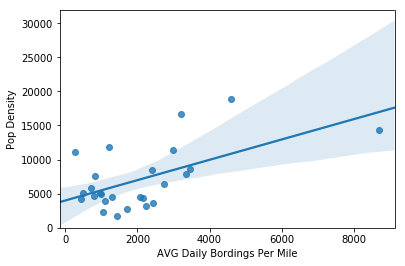

In [6]:
#visualize the correlation between AVG Daily Bordings Per Mile and Population Density

sns.regplot(x="AVG Daily Bordings Per Mile", y="Pop Density", data=df_rs)
plt.ylim(0,)

In [7]:
#### There is a positive linear correlation. Now, I am going to run a correlation command to see the strength of that correlation by isolating those two data points.

df_rs[["Pop Density", "AVG Daily Bordings Per Mile"]].corr()

,Pop Density,AVG Daily Bordings Per Mile
Pop Density,1.000000,0.581689
AVG Daily Bordings Per Mile,0.581689,1.000000


In [8]:
#This mean 'Population Density' is very high. I belive this is due to several lines from the NYC area, San Francisco, and Boston being included in the dataset. Since NYC 
#and the surrounding communities are some of the most densely populated areas on the globe (as well as San Fancisco and Boston) I am going to remove them from the data set as
#outliers. This should help establish a better mean average density. 

df_rs2 = df_rs.drop([0,1,4,5,25], axis=0)

In [9]:
#The dataframe df_rs contains all of the information from the ligh-right systems in the United States. I will now make a new dataframe of the top 10 performing systems as 
#defined by the most boardings per mile. Afterwards, I will perform a mean average analysis of the number of persons per square mile column. Set up the mean average for the 
#Pop Density
df_rs3 = df_rs2.head(10)

df_rs3

,System Name,City,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density
2,Link,Seattle,24155900,74400,3456,8642
3,METRO Light Rail,Minneapolis,23811200,71900,3344,7820
6,Buffalo Metro Rail,Buffalo,4560600,16900,2734,6436
7,METRORail,Houston,18808000,61100,2427,3660
8,Metro Rail,Los Angeles,67921600,219900,2403,8483
9,Valley Metro Rail,Phoenix,16269000,48900,2240,3207
10,San Diego Trolley,San Diego,37215800,112100,2140,4325
11,MAX Light Rail,Portland,39173700,119700,2070,4504
12,Lynx,Charlotte,5228500,16900,1708,2827
13,TRAX,Salt Lake City,18823500,63000,1435,1709


In [10]:
#After removing the outliers, I am goint to rerun the correlation commands on the new dataframe to determine if the Population Density and AVG Bordings Per Mile strengthens. 
df_rs3.corr()

,Annual Ridership,Daily Ridership,AVG Daily Bordings Per Mile,Pop Density
Annual Ridership,1.000000,0.998189,0.039953,0.438033
Daily Ridership,0.998189,1.000000,0.025802,0.436752
AVG Daily Bordings Per Mile,0.039953,0.025802,1.000000,0.846095
Pop Density,0.438033,0.436752,0.846095,1.000000


(0, 11420.899182750503)

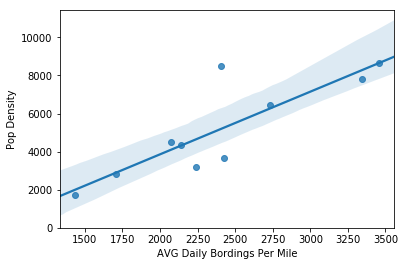

In [11]:
#visualize the correlation between AVG Daily Bordings Per Mile and Population Density. We can see that the correlation has strengthen drastically. This confirms that the removal
#of the data was the right move.

sns.regplot(x="AVG Daily Bordings Per Mile", y="Pop Density", data=df_rs3)
plt.ylim(0,)

In [12]:
#Perform the mean average calculation on the df3 dataframe to determine a benchmark for an analysi on Atlanta's NPU districts.
df_rs3["Pop Density"].mean()

5161.3

In [13]:
#P-Value probability value to further test correlation between the two variables (Pop Density and AVG Bordings Per Mile)

from scipy import stats

In [14]:
pearson_coef, p_value = stats.pearsonr(df_rs3['Pop Density'], df_rs3['AVG Daily Bordings Per Mile'])
print("The Peason Correlation Coefficient is", pearson_coef, "with P-value of P =", p_value)

The Peason Correlation Coefficient is 0.8460952200149079 with P-value of P = 0.0020297288219629623


In [15]:
#Since the p-value is close to < 0.001 we can I can write with certainty that the correlation is in fact very strong. 

## Step 2: Scape and Analyze the City of Atlanta NPU Data

#### The information that is compiled on this table once again required extensive work. The format in which it was provided was inconsistent and very unclean. Furthermore, the information was spread across multiple data sources, including the United States Census Bureau, the Atlanta Regional Commission, and the City of Atlanta government. 

#### As I did before, I decided to wrangle and clean the data outside the notebook environement. I saved the formatted document in CSV UTF-8 and uploaded that documentation to the IBM Cloud by structuring a connection between my local drive and the IBM Notebook. I loaded the proper libraries for importing these documents from the IBM cloud.

In [16]:
#point my notebook toward the correct IBM Cloud bucket where I uploaded and stored the dataset. 
body = client_4cfe7dfb4a504374b8734800f9bfe390.get_object(Bucket='ibmcapstoneprojectatlantatransite-donotdelete-pr-1vuo37pk120fvz',Key='PopJobs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#read the dataset into a pandas formatted dataframe.
df_atl = pd.read_csv(body)
df_atl

,NEIGH DISTRICT,TOTAL POP,POP SQ MILE,AVG SQ MILE,JOBS
0,NPU A,12506,11.43,1094,6521
1,NPU B,48709,10.18,4785,91833
2,NPU C,18226,6.05,3013,6370
3,NPU D,11361,6.49,1751,17068
4,NPU E,45375,5.91,7678,99242
5,NPU F,25661,6.00,4277,11200
6,NPU G,8266,5.62,1471,3675
7,NPU H,15452,6.39,2418,2424
8,NPU I,23650,9.59,2466,3349
9,NPU J,10160,4.44,2288,3397


In [17]:
#organize the dataframe and sort it by the AVG Persons Per Square Mile and print it
df_atl.sort_values(by=['AVG SQ MILE'], inplace =True, ascending=False)

print(df_atl)

   NEIGH DISTRICT  TOTAL POP  POP SQ MILE  AVG SQ MILE    JOBS
21          NPU W      21502         1.52        14146    6790
12          NPU M      30647         3.78         8108  131381
4           NPU E      45375         5.91         7678   99242
19          NPU T      17260         2.74         6299    4965
13          NPU N      19039         3.44         5535    6426
11          NPU L       6970         1.32         5280    1883
20          NPU V      15542         3.17         4903    3790
1           NPU B      48709        10.18         4785   91833
5           NPU F      25661         6.00         4277   11200
10          NPU K       9973         2.39         4173    2478
14          NPU O      14946         3.89         3842    3910
17          NPU R      18753         5.39         3479    2550
23          NPU Y      10369         3.29         3152    1762
2           NPU C      18226         6.05         3013    6370
22          NPU X      12777         4.36         2931 

In [18]:
#The benchmark states that the most used light rail transit lines are placed in areas with a population density of 5,161 people per square mile. Using this as a benchmark, I would like to determine 
#which of the City of Atlanta's NPU Districts meet this minimal requirement. 

# Test for linking linking accounts
#### Visualizing the Data via Folium and Creating a map of the city.

In [19]:
!conda install -c odm2 folium --yes
import folium

print('Folium install and imported')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                1         134 KB
    branca-0.2.0               |           py36_1          37 KB  odm2
    folium-0.5.0               |           py36_0          76 KB  odm2
    ------------------------------------------------------------
                                           Total:         247 KB

The following NEW packages will be INSTALLED:

    branca:          0.2.0-py36_1 odm2
    folium:          0.5.0-py36_0 odm2

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0       --> 2019.5.15-1


ca-certificates-2019 | 134 KB    | ##################################### | 100% 
branca-0.2.0         | 37 KB     | ##################################### | 

In [20]:
#passing in the longitude and latitude of the City of Atlanta to create a specific city map 

atlanta_location = [33.7490, -84.3880]
atlanta_map = folium.Map(location=atlanta_location, zoom_start=11, tiles='Stamen Terrain')

#display map
atlanta_map

In [21]:
!wget -q -o 'NPU.json' quiet https://github.com/jordanstreiff/atlanta-city-council-search/blob/master/public/NPU.geojson

print('GeoJSON file downloaded')

GeoJSON file downloaded


In [22]:
with open('NPU.geojson') as json_data:
    NPU_data = json.load(json_data)

NameError: name 'json' is not defined

In [23]:
atlanta_geo = r'NPU.geojson'

world_map = folium.Map(location=[33.7490, -84.3880], zoom_start=11, tiles='Mapbox Bright')

In [31]:
#generate a choropleth map using the population density information
world_map.choropleth(
    geo_data=atlanta_geo,
    data=df_atl,
    columns=['NEIGH DISTRICT', 'AVG SQ MILE'],
    key_on='feature.properties.district',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Atlanta Density Map')

#display the map
atlanta_map

JSONDecodeError: Expecting value: line 7 column 1 (char 6)

In [67]:
#select only those with density at or above 5,000 people per square mile.

NPU = df_atl['AVG SQ MILE'] > 5000

df_atl[NPU]

,NEIGH DISTRICT,TOTAL POP,POP SQ MILE,AVG SQ MILE,JOBS
4,NPU E,45375,5.91,7678,99242
11,NPU L,6970,1.32,5280,1883
12,NPU M,30647,3.78,8108,131381
13,NPU N,19039,3.44,5535,6426
19,NPU T,17260,2.74,6299,4965
21,NPU W,21502,1.52,14146,6790


In [38]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.
